In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
%matplotlib inline

In [127]:
df = pd.read_csv('./gapminder.csv')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [8]:
unique_years = df['year'].unique()

In [29]:
# Define which continent / category we will use
category = 'lifeExp'
continent = 'Asia'

# Create a mask that selects the continent of choice
mask_continent = df['continent'] == continent
df_continent = df[mask_continent]

# Loop through years and calculate the statistic of interest
years = df_continent['year'].unique()
summary = []
for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append((continent, year, value))
    
# Turn the summary into a dataframe so that we can visualize easily
summary = pd.DataFrame(output, columns=['continent', 'year', category])

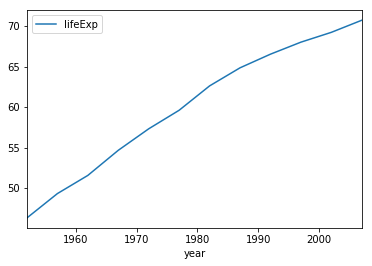

In [28]:
summary.plot.line('year', 'lifeExp')

In [42]:
def calculate_statistic_over_time(data, category, continent, func=None):
    if func is None:
        func = np.mean
        
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

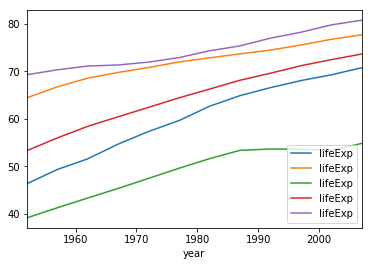

In [43]:
category = 'lifeExp'
continents = df['continent'].unique()

fig, ax = plt.subplots()
for continent in continents:
    output = calculate_statistic_over_time(df, category, continent)
    output.plot.line('year', category, ax=ax)

[None, None, None, None, None, None, None, None, None, None]

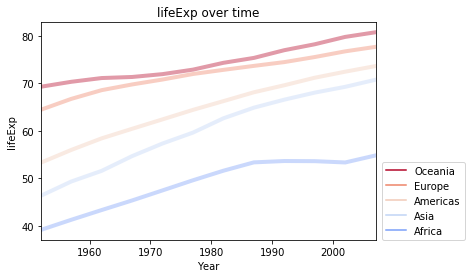

In [102]:
category = 'lifeExp'
mean_values = df.groupby('continent').mean()[category]
mean_values = mean_values.sort_values(ascending=False)
continents = mean_values.index.values

n_continents = len(continents)
cmap = plt.cm.coolwarm_r

fig, ax = plt.subplots()
for ii, continent in enumerate(continents):
    this_color = cmap(float(ii / n_continents))
    output = calculate_statistic_over_time(df, category, continent)
    output.plot.line('year', category, ax=ax, label=continent,
                     color=this_color)
    plt.legend(loc=(1.02, 0))
    ax.set(ylabel=category, xlabel='Year',
           title='{} over time'.format(category))
    
plt.setp(ax.lines, lw=4, alpha=.4)

In [135]:
def plot_statistic_over_time(data, category, func=None,
                             cmap=None, ax=None, legend=True,
                             sort=True):
    if ax is None:
        fig, ax = plt.subplots()
    if cmap is None:
        cmap = plt.cm.viridis
    
    if sort is True:
        # Sort the continents by the category of choice
        mean_values = df.groupby('continent').mean()[category]
        mean_values = mean_values.sort_values(ascending=False)
        continents = mean_values.index.values
    else:
        continents = np.unique(df['continent'])
    n_continents = len(continents)

    # Loop through continents, calculate its stat, and add a line
    for ii, continent in enumerate(continents):
        this_color = cmap(float(ii / n_continents))
        output = calculate_statistic_over_time(data, category, continent)
        output.plot.line('year', category, ax=ax, label=continent,
                         color=this_color)
        if legend is True:
            plt.legend(loc=(1.02, 0))
        else:
            ax.get_legend().set(visible=False)
        ax.set(ylabel=category, xlabel='Year',
               title='{} over time'.format(category))

    plt.setp(ax.lines, lw=4, alpha=.4)
    return ax

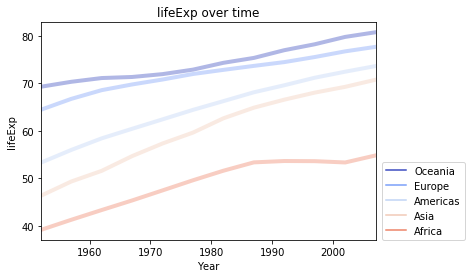

In [136]:
plot_statistic_over_time(df, category, continent, cmap=plt.cm.coolwarm)

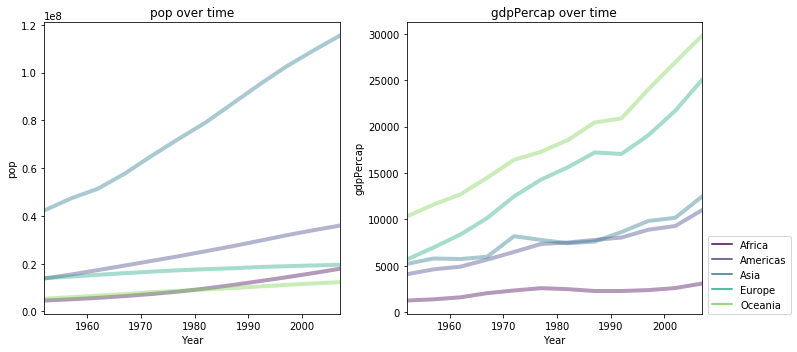

In [138]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
categories = ['pop', 'gdpPercap']
for ax, i_category in zip(axs, categories):
    plot_statistic_over_time(df, i_category, continent,
                             ax=ax, sort=False)
plt.setp(axs[0].get_legend(), visible=False)
plt.tight_layout()

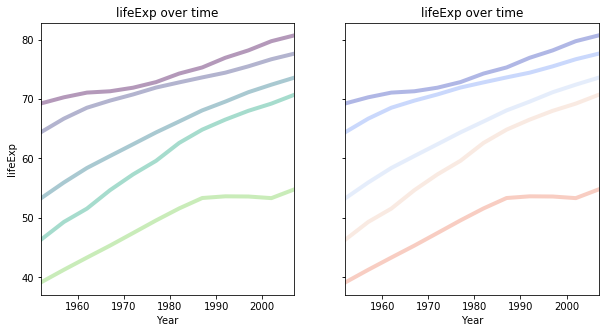

In [152]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
cmaps = [plt.cm.viridis, plt.cm.coolwarm]
for ax, cmap in zip(axs, cmaps):
    plot_statistic_over_time(df, category, continent,
                             cmap=cmap, ax=ax, legend=False)


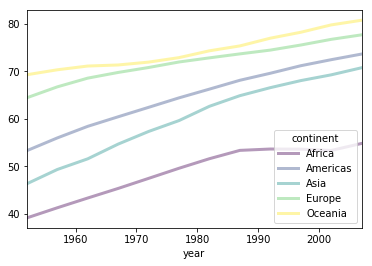

In [148]:
ax = df.groupby(['continent', 'year']).mean()['lifeExp']\
       .unstack('continent').plot(cmap=plt.cm.viridis, alpha=.4, lw=3)

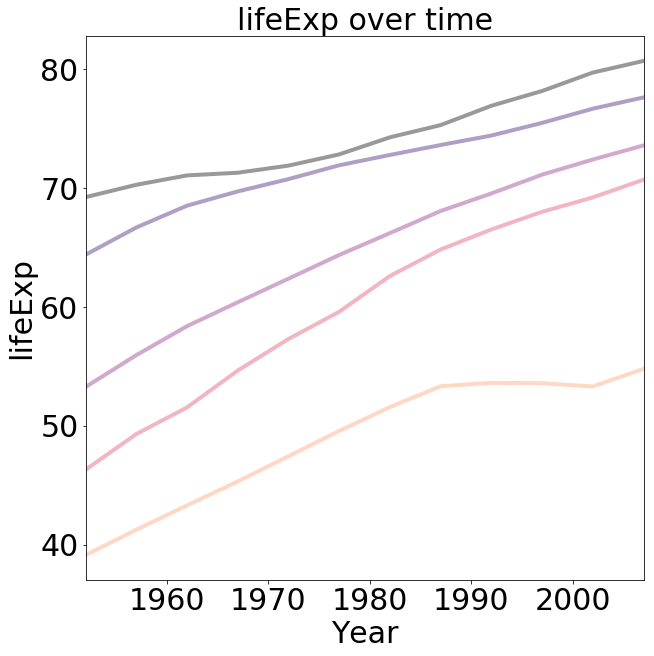

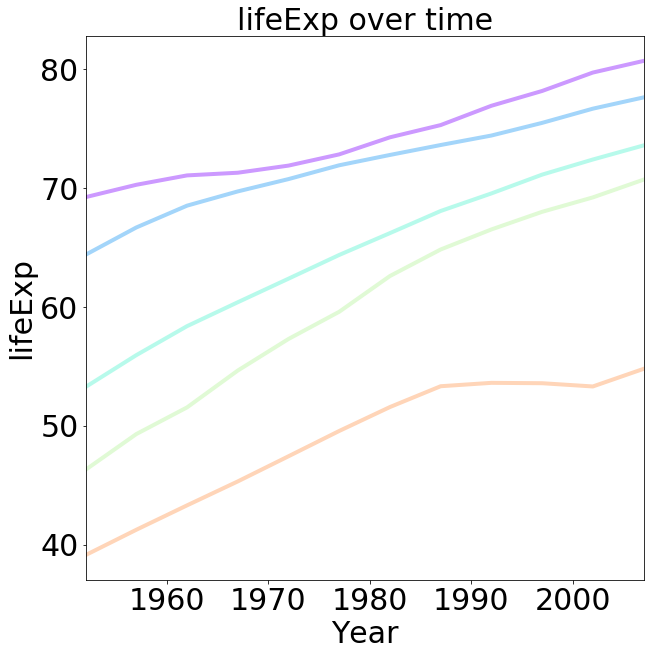

In [165]:
# Saving for publication
cmaps = [plt.cm.magma, plt.cm.rainbow]
for ii, cmap in enumerate(cmaps):
    fig, ax = plt.subplots(figsize=(10, 10), sharey=True)
    plot_statistic_over_time(df, category, continent,
                             cmap=cmap, ax=ax, legend=False)
    labels = [ax.get_xticklabels(), ax.get_yticklabels(),
              ax.yaxis.label, ax.xaxis.label, ax.title]
    _ = plt.setp(labels, fontsize=30)
#     ax.set_axis_off()
    fig.savefig('fig_{}.png'.format(ii), transparent=True, bbox_inches='tight')